# <div align="center"><font color='#FE605F'>♡ Speed Dating ♡</font></div>

<div align="center">
  <img src="data/sean-stratton-wQkZdceduxs-unsplash.jpg" width='300' height='400' style='object-fit:contain;' />
</div>

# Summary

1. Introduction 
2. Basic dataset statistics
3. Who are the participants?
4. Rating and Deciding
5. What makes people interested in each other?
6. Conclusion

---

## Introduction

What makes people interested into each other to go on a second date together ?

> **Let's go find out, What gets people a second date ?**

<br />

About the data:

  > The dataset we will explore in the project is named “Speed Dating Experiment”, as found on Kaggle.com. It was compiled by professors Ray Fisman and Sheena Iyengar from Columbia Business School.

- Data was gathered from 551 participants in experimental speed dating events from 2002-2004.
- During the events, the attendees would have a four minute "first date" with every other participant of the opposite sex.
- At the end of their four minutes, participants were asked if they would like to see their date again. They were also asked to rate their date on six attributes:
  - Attractiveness
  - Sincerity
  - Intelligence
  - Fun
  - Ambition
  - Shared Interests.
- The dataset also includes questionnaire data gathered from participants at different points in the process. These fields include:
  - demographics
  - dating habits
  - self-perception across key attributes
  - beliefs on what others find valuable in a mate
  - lifestyle information

Here is the [**link**](https://www.kaggle.com/datasets/annavictoria/speed-dating-experiment), you can download the **Speed Dating Dataset** as well as **speed-dating-data-key.doc** for data dictionary and question key.

In [299]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from utils import get_value
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# ignore warnings
warnings.filterwarnings("ignore")

# The following lines allow visualising all columns of an output if necessary
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('data/Speed Dating Data.csv', encoding='ISO-8859-1')

## Basic dataset statistics

In [3]:
# Basic stats
print("Number of rows : {}".format(df.shape[0]))
print("Number of columns : {}".format(df.shape[1]))
print()

print("Display of dataset: ")
display(df.head())
print()

print("Basics statistics: ")
data_desc = df.describe(include='all')
display(data_desc)
print()

print("Missing values per column: ")
display((df.isnull().sum()).sort_values(ascending=False))

Number of rows : 8378
Number of columns : 195

Display of dataset: 


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9


Basics statistics: 


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,8378.000000,8368.000000,8378.000000,8220.000000,8378.000000,8274.000000,8305.000000,8289.000000,8289.000000,8289.000000,8280.000000,8271.000000,8249.000000,8378.000000,8166.000000,8091.000000,8072.000000,8018.000000,7656.000000,7302.000000,8128.000000,8060.000000,7993.000000,8283.000000,8315,8296.000000,4914,3133,3583,8315.000000,8299.000000,8299.000000,8299,7314,4279,8299.000000,8281.000000,8299.000000,8289,8240.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8277.000000,1800.000000,8299.000000,8299.000000,8299.000000,8289.000000,8279.000000,8257.000000,6489.000000,6489.000000,6489.000000,6489.000000,6489.000000,6467.000000,8299.000000,8299.000000,8299.000000,8299.000000,8289.000000,8289.000000,8273.000000,8273.000000,8273.000000,8273.000000,8273.000000,4906.000000,4906.000000,4906.000000,4906.000000,4906.000000,8378.000000,8176.000000,8101.000000,8082.000000,8028.000000,7666.000000,7311.000000,8138.000000,8069.000000,8003.000000,7205.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,7463.000000,7463.000000,7433.000000,1984.000000,1955.000000,1984.000000,1984.000000,1955.000000,1974.000000,7445.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.00000,5775.000000,5775.000000,5775.000000,5775.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,4377.000000,4377.000000,4377.000000,4377.000000,4377.000000,3974.000000,3974.000000,3974.000000,1496.000000,668.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2016.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259,NaN,241,68,115,NaN,NaN,NaN,269,409,261,NaN,NaN,NaN,367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,


Missing values per column: 


num_in_3    7710
numdat_3    6882
expnum      6578
sinc7_2     6423
amb7_2      6423
            ... 
wave           0
condtn         0
idg            0
gender         0
dec            0
Length: 195, dtype: int64

### Preprocessing

In [4]:
# count of missimg values
pd.DataFrame(df.isna().sum().values.reshape(1,-1), columns= df.columns)

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,0,1,0,0,0,0,0,0,1846,0,0,10,0,158,0,104,73,89,89,89,98,107,129,0,212,287,306,360,722,1076,250,318,385,95,63,82,3464,5245,4795,63,79,79,79,1064,4099,79,97,79,89,138,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,101,6578,79,79,79,89,99,121,1889,1889,1889,1889,1889,1911,79,79,79,79,89,89,105,105,105,105,105,3472,3472,3472,3472,3472,0,202,277,296,350,712,1067,240,309,375,1173,4282,4282,4282,4282,4282,4282,4378,4378,4378,4378,4378,915,915,945,6394,6423,6394,6394,6423,6404,933,915,915,915,915,915,2603,2603,2603,2603,2603,2603,2603,2603,2603,2603,2603,2603,915,915,915,915,915,4001,4001,4001,4001,4001,4404,4404,4404,6882,7710,4404,4404,4404,4404,4404,4404,6362,6362,6362,6362,6362,6362,5419,5419,5419,5419,5419,5419,5419,5419,5419,5419,5419,6362,4404,4404,4404,4404,4404,6362,6362,6362,6362,6362


> There are lot of columns with a lot of NaN's (missing values) in the dataset. Probably bad practice to use imputation to guess the values or remove all rows that have NaN's in it. We could also decide to remove columns that have more than 4000 (50%) missing values.

> So for the rest of the analysis, we'll just disregard those columns.

In [5]:
# remove variables that will not be used in analysis
useless_cols = ['id', 'idg', 'condtn', 'position', 'positin1', 'partner', 'tuition', 'undergra', 'mn_sat']
df = df.drop(useless_cols, axis=1)

In [6]:
# add labels
df['gender_label'] = df['gender'].apply(lambda x: 'Female' if x == 0 else 'Male')
df['match_label'] = df['match'].apply(lambda x: 'not_match' if x == 0 else 'match')

## Who are the participants ?

we will explore about people's age, gender, race, field, and more in order to finding some unexpected differences in various segments of this sample of people.

In [7]:
# grouped the dataset by the iid in order to have unique participants in the study.
df_unique = df.groupby("iid").mean(numeric_only=True).reset_index(drop=False)

#### Age and Gender

In [8]:
df_unique['gender_label'] = df_unique['gender'].apply(lambda x: 'Female' if x == 0 else 'Male')

In [9]:
tmp = df_unique['gender_label'].value_counts()
fig = px.pie(values=tmp.values, names=tmp.index, hole=.4, title='Distribution of Gender')
fig.show()

> Slightly more males than females. Let's see if we can see some differences age-wise

In [10]:
fig = px.histogram(df_unique, x='age', nbins=30, title='Age Distribution')
fig.show()

> So most of the participants were in their mid twenties to early thirties.

Let's see age distribution by gender

In [11]:
fig = px.box(df_unique, x="gender_label", y="age", color="gender_label", color_discrete_sequence=["#F78FE4", "#0460C9"])
fig.show()

> The median age of men (27) is slightly greater than the median age of women (26 years). mens are in range of age of 18 - 36 and womens are in between 19 - 35. Except 3 men and 3 women having ages outside this range.

#### Race

Out of curiosity we took a look at the racial distribution of the data set.

In [12]:
df_unique['race_label'] = df_unique['race'].map({1.0: 'Black/African American', 2.0: 'European/Caucasian-American', 3.0: 'Latino/Hispanic American', 4.0: 'Asian', 5.0: 'Native American', 6.0: 'Other', np.nan: 'NA'})

fig = px.histogram(x=df_unique['race_label'], title='Distribution of Race')
fig.show()

> We can see most of European participants, then Asian.

#### Field of study

In [13]:
def categorize_field(x):
    category_mappings = {
        14: "Film",
        15: "Fine Arts/Arts Administration",
        8: "Business/Econ/Finance ",
        2: "Math",
        5: "Engineering",
        10: "Biological Sciences/Chemistry/Physics",
        4: "Medicine, Pharma and Biotech",
        9: "Education, Academia",
        1: "Law",
        13: "Political Science/International Affairs ",
        6: "English/Creative Writing/ Journalism",
        16: "Languages",
        3: "Social Sciences, Psychologist ",
        7: "History/Religion/Philosophy ",
        11: "Social Work",
        17: "Architecture",
        12: "Undergrad / Undecided",
        18: "Other"
    }

    return category_mappings.get(x, "NA")

In [14]:
df_unique['field_label'] = df_unique["field_cd"].apply(categorize_field)

In [15]:
fig = px.histogram(x=df_unique['field_label'], title='Distribution of Field')
fig.show()

> most represented domains of study are Economy, Sicence, Engineering and Law

In [50]:
tmp = df_unique.groupby(by=["field_label", "gender_label"]).size().reset_index(name="count")
fig = px.bar(tmp, x="field_label", y='count', color="gender_label", barmode="stack", title='Field of study by Gender', text_auto = '.0f')
fig.show()

> Economy and Engineering are mostly male-dominated.

> lot of women studied Social Sciences, Psychologist, Education / Academeia, and Social Work.

> In Biological Sciences, Law and political science, men and women are nearly equally represented.

#### Do we care about race ?

In [17]:
fig = px.histogram(x=df_unique['imprace'], title="Importance of race")
fig.show()

> No, For the majority of person the race is not the important feature.

#### Do we care about religion ?

In [21]:
fig = px.histogram(x=df_unique['imprelig'], title="Importance of religion")
fig.show()

> No, For the majority of person the religion is not the important feature.

#### Activities interested

May be shared interests could be an important variable

In [22]:
activities_interested=['sports','tvsports','exercise','dining','museums','art','hiking','gaming','clubbing','reading',
                       'tv','theater','movies','concerts','music','shopping','yoga']
activities = df_unique.groupby(['gender_label']).mean()[activities_interested].values

Text(0.5, 1.0, 'Correlation between interests')

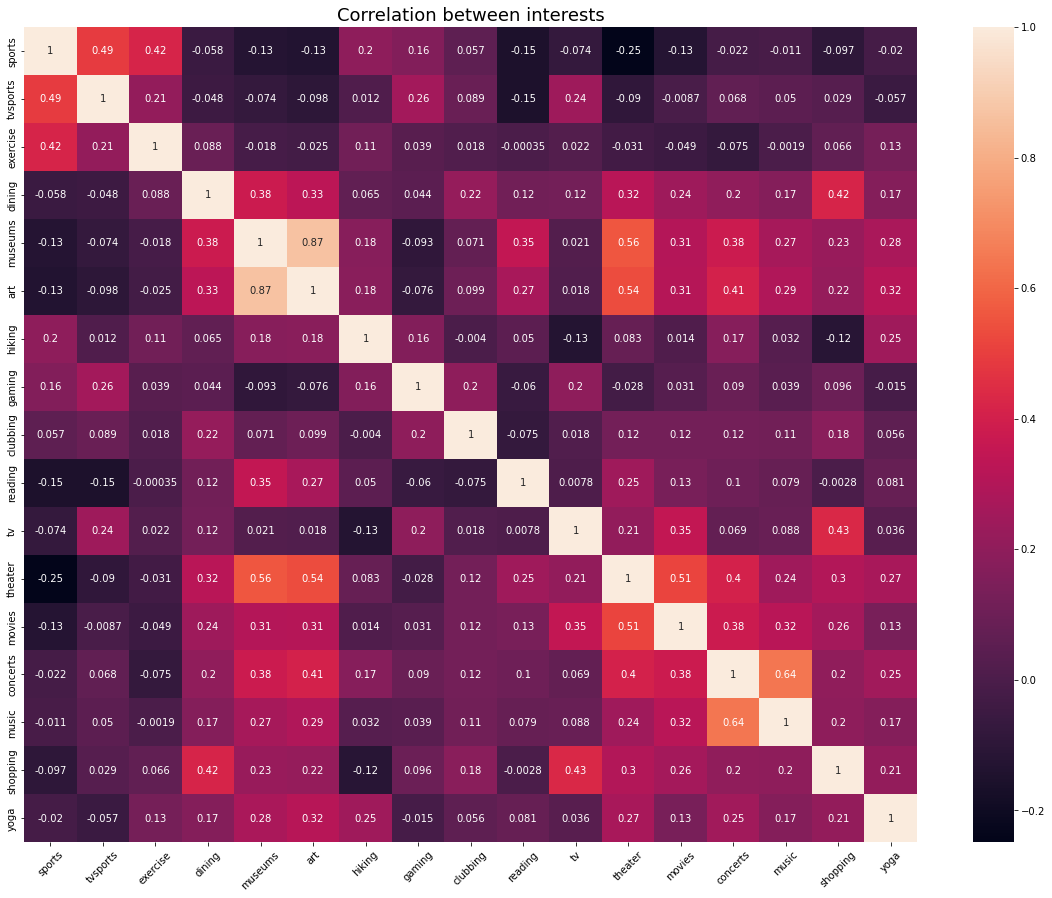

In [23]:
corr = df_unique[activities_interested].corr()
plt.figure(figsize=(20,15))
ax = sns.heatmap(corr, annot=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title('Correlation between interests', fontsize=18)

> We have some correlations going in there but not a surprise,
- People who loves **art** likes also **museums** 
- People who loves **music** likes also **concerts**
- People who loves **movies** likes also **theater**
- People who loves **theater** likes also **museums**

In [24]:
trace1 = go.Bar(
    x=activities_interested,
    y=activities[0,:],
    name='Women',
    #orientation = 'h',
)
trace2 = go.Bar(
    x=activities_interested,
    y=activities[1,:],
    name='Men',
    #orientation = 'h',
)

data3 = [trace2, trace1]
layout = go.Layout(
    title='Interest by activities Men vs Women',
    font=dict(
        size=16
    ),
    barmode = 'group',
    legend=dict(
        font=dict(
            size=16
        )
    )
)
fig = go.Figure(data=data3, layout=layout)
fig.show()

> Women's are more interest have an higer average on all activities than male except in **sports, tvsports and gaming**

**Now We studied the population, Go find out how participants rating their partners**

## Rating and Deciding

#### How Many Speed Dates found a match

In [65]:
tmp = df['match_label'].value_counts()
fig = px.bar(x=tmp.index, y=tmp.values, color=tmp.index, color_discrete_sequence=['lightgrey', '#00CC96'], title='Field of study by Gender', text_auto = '.0f')
fig.show()

In [67]:
print(f"only about {df['match'].value_counts(normalize=True)[1] * 100 : .1f}% of dates are succeeded with a second date")

only about  16.5% of dates are succeeded with a second date


#### To understand this outcome, we should look at participant's lifestyle like **Goals and Habits**

In this subsection, we will see what the participants declared to be their intentions to be and what they usually do in terms of going out and dating

In [73]:
df_unique['goal_label'] = df_unique['goal'].map({
    1: 'Fun', 
    2: 'Meet', 
    3: 'Date',
    4: 'Relationship', 
    5: 'IdidIt', 
    6: 'Other'}).fillna(df_unique['goal'])

df_unique['goal_label'].value_counts(dropna=False)

Fun             228
Meet            189
Date             40
IdidIt           35
Other            30
Relationship     22
NaN               7
Name: goal_label, dtype: int64

> Most of the people declare to be there to have fun and meet new people. Let's see if there is some trend in gender.

In [108]:
tmp = df_unique[['goal_label' ,'gender_label']].groupby(['goal_label', 'gender_label']).size().unstack()

In [107]:
trace1 = go.Bar(
    x=tmp['Female'].index,
    y=tmp['Female'].values,
    name='Women',
    #orientation = 'h',
)
trace2 = go.Bar(
    x=tmp['Male'].index,
    y=tmp['Male'].values,
    name='Men',
    #orientation = 'h',
)

data3 = [trace2, trace1]
layout = go.Layout(
    title='Goal in participating in this event Men vs Women',
    font=dict(
        size=16
    ),
    barmode = 'group',
    legend=dict(
        font=dict(
            size=16
        )
    )
)
fig = go.Figure(data=data3, layout=layout)
fig.show()

> The main difference between men and women is looking for a date (twice as many as men) or wanting to meet someone new (girls don't just want to have fun, they want to meet new people).

#### Do women receive more positive final decisions ?

```dec_o``` = decision of partner

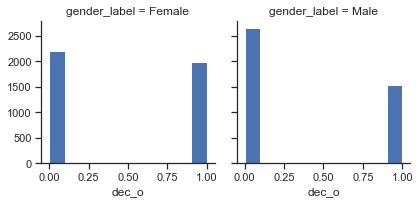

In [119]:
# looking at dec_o by gender
sns.set(style="ticks", color_codes=True)
g = sns.FacetGrid(df, col="gender_label")
g = g.map(plt.hist, "dec_o")
plt.ticklabel_format(useOffset=False, style='plain')

> It looks like Female participants received about 2200 'no' 2000 'yes' so women were liked by their partners in almost half of the speed dates.

> and only 36 % of men were liked by their partners.

## What makes people interested into each other to go on a second date together

- ### Is age difference a problem for getting a match ?

In [302]:
df['age_difference'] = (df['age'] - df['age_o']).abs()
# Creating a box plot using plotly.express
fig = px.box(df, x='match', y='age_difference', color='match', color_discrete_map={0 :'grey', 1 :'green'})

# Setting axis labels and title
fig.update_layout(
    xaxis=dict(title='Match'),
    yaxis=dict(title='Age difference'),
    title='Match by age difference'
)

fig.show()

> the median age for match and not-match dates are 3, so the age difference between partners has a minimal impact on their likelihood of matching.
> Maximum age difference in successful match is 17. whereas for all couples with a larger age difference, there was no match.

- ### Is it important to belong to the same human race ?

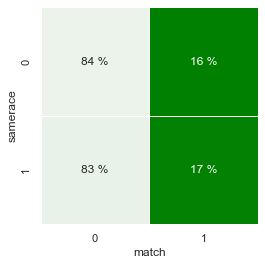

In [311]:
cmap = sns.light_palette("green", as_cmap=True, reverse=True)

sns.set()
fig, ax0 = plt.subplots(1,1)
career_cont_table = pd.crosstab(index=df['samerace'], columns=df['match'], normalize='index')*100
ax = sns.heatmap(career_cont_table, annot=True, cmap=cmap, square=1, linewidth=1., cbar=False)
for t in ax.texts: t.set_text(t.get_text() + " %")
plt.show()

> Partners with same race seem to be lesser importance for getting a match.

In [143]:
df['int_corr'].abs() > 0.5

1504

- ### Is it important to have same interests ?

In [146]:
# create a box plot using plotly.express
fig = px.box(df, x='match', y='int_corr', color='match', color_discrete_map={0 :'grey', 1 :'green'})

# set axis labels and title
fig.update_layout(
    xaxis=dict(title='Match'),
    yaxis=dict(title='Correlation of interests'),
    title='Match and correlation of interests'
)

fig.show()

> The median correlation of interests is higher for the couples who matched (0.25 compared to 0.21 for couples that did not match).

- ### Is it important to study in the same field?

In [184]:
df['same_field'] = df.apply(lambda x: x['field_cd'] == get_value(df_unique, x['pid'], 'field_cd'), axis=1)

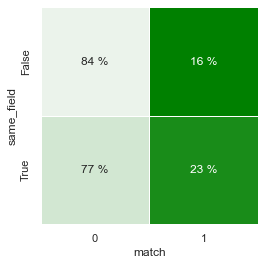

In [186]:
cmap = sns.light_palette("green", as_cmap=True, reverse=True)

sns.set()
fig, ax0 = plt.subplots(1,1)
career_cont_table = pd.crosstab(index=df['same_field'], columns=df['match'], normalize='index')*100
ax = sns.heatmap(career_cont_table, annot=True, cmap=cmap, square=1, linewidth=1., cbar=False)
for t in ax.texts: t.set_text(t.get_text() + " %")
plt.show()

> Partners studying in the same field have better chances to match (23%) than couples where partners study in different fields (16 %).

- ### Is it important to have similar professional plans ?

In [187]:
df['same_career_plan'] = df.apply(lambda x: x['career_c'] == get_value(df_unique, x['pid'], 'career_c'), axis=1)

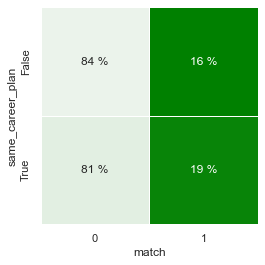

In [189]:
cmap = sns.light_palette("green", as_cmap=True, reverse=True)

sns.set()
fig, ax0 = plt.subplots(1,1)
career_cont_table = pd.crosstab(index=df['same_career_plan'], columns=df['match'], normalize='index')*100
ax = sns.heatmap(career_cont_table, annot=True, cmap=cmap, square=1, linewidth=1., cbar=False)
for t in ax.texts: t.set_text(t.get_text() + " %")
plt.show()

> Not big impact

- ### Should people care about social skills ?

> we will rely on habits of participants. we will explore factors such as how often they go on dates and how frequently they go out socially.

we will use : 
```
- date "how frequently do you go on dates ?" : 
		Several times a week=1
		Twice a week=2
		Once a week=3
		Twice a month=4
		Once a month=5
		Several times a year=6
		Almost never=7

- go_out "How often do you go out (not necessarily on dates) ?" :
		Several times a week=1
		Twice a week=2
		Once a week=3
		Twice a month=4
		Once a month=5
		Several times a year=6
		Almost never=7

- dec_o "contains information whether the partner liked the participant or not. we'll use this column as our target variable"
````

We could achieve this by visualizing the logistic regression

<Figure size 1080x720 with 0 Axes>

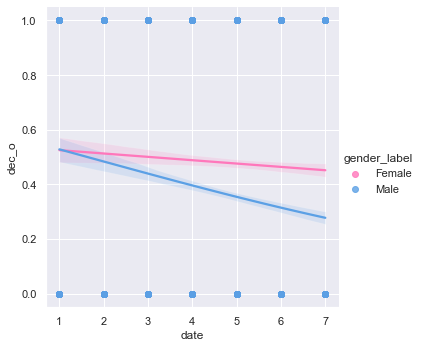

In [289]:
gender_palette = sns.color_palette(["#ff77bb", "#5ba0e5"])

plt.figure(figsize=(15, 10))
sns.lmplot(x="date", y="dec_o", data=df, hue="gender_label", logistic=True, palette=gender_palette)
plt.show()

> Here, it is shown that the probability of getting liked by the partner decreases with the participant's dating frequency.

> this effect is much more noticeable for men: the men who date most frequently have more than 0.5 possibility to be be liked while men who date least frequently have only 0.3 possibility to be liked.

<Figure size 1080x720 with 0 Axes>

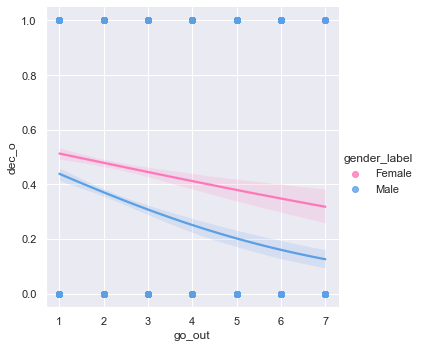

In [292]:
plt.figure(figsize=(15, 10))
sns.lmplot(x="go_out", y="dec_o", data=df, hue="gender_label", logistic=True, palette=gender_palette)
plt.show()

> the less a person a goes out, the less likes he or she gets.

> It is still visible that men are on average less successful in getting likes from women than vice versa.

- ### What Are Participants Looking For in Their Matches (**Before the Speed dates**)

First, we’d like to see what do the participants in these speed dating events look for in the opposite sex, and if there exist a difference for male and female participants. At this point in time, the participants have just signed up for the event and have not met anyone.

In [274]:
fig = go.Figure()

others = ['gender']
attributes  = ['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']

tmp_female = df.loc[df['gender'] == 0, attributes + others].groupby('gender').mean().reset_index()
tmp_male = df.loc[df['gender'] == 1, attributes + others].groupby('gender').mean().reset_index()

# male
fig.add_trace(go.Scatterpolar(
      r=np.squeeze(tmp_male[attributes].values).tolist(),
      theta=attributes,
      fill='toself',
      name='Male'
))

# female
fig.add_trace(go.Scatterpolar(
      r=np.squeeze(tmp_female[attributes].values).tolist(),
      theta=attributes,
      fill='toself',
      name='Female'
))

fig.show()

> We can see that there is a great difference between what male and female participants are looking for.

  - For male participants, the attractiveness of the female is given a lot more weight, and the ambitiousness or if they have any shared interset are ranked not as high.

  - For females, the points are more evenly distributed across all of the attributes, They really care about intelligent and sincere.

- ### What are the attributes that matter in the final decision ?

```dec``` is the column in which participants say yes or no to their partner.

```['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob', 'met']``` are the columns in which the participant rate the attributes of their partner

> to answer the question, let's build a **linear regression model**

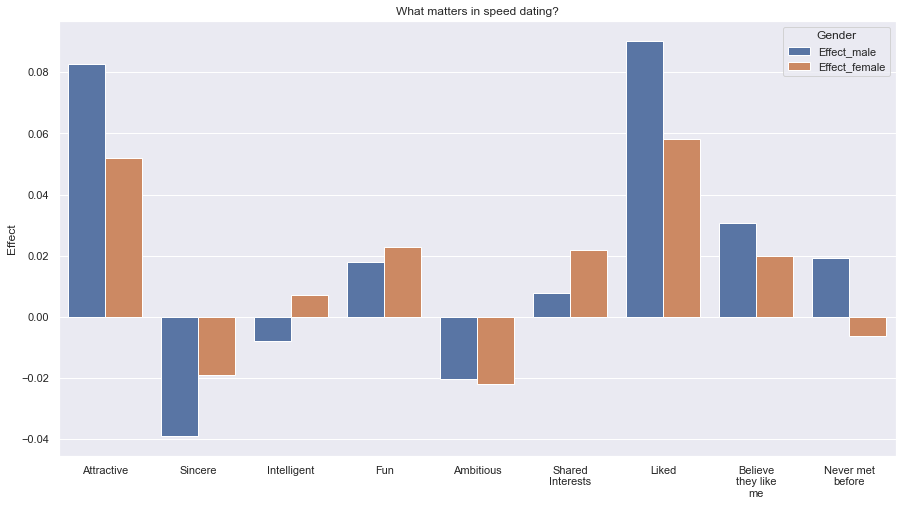

In [300]:
# Subset data by gender
data_f = df[df['gender'] == 0]
data_m = df[df['gender'] == 1]

numerical_features = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob', 'met']
categorical_features = []

X_data_f = data_f[numerical_features + categorical_features]
X_data_m = data_m[numerical_features + categorical_features]

imp_f_mean = SimpleImputer(strategy='mean')
imp_m_mean = SimpleImputer(strategy='mean')

X_data_f = imp_f_mean.fit_transform(X_data_f)
X_data_m = imp_m_mean.fit_transform(X_data_m)

# Fit linear regression models
model_f = LinearRegression().fit(X_data_f, data_f['dec'])
model_m = LinearRegression().fit(X_data_m, data_m['dec'])

# Compute effect sizes
effect_sizes_f = model_f.coef_
effect_sizes_m = model_m.coef_

# Combine effect sizes for male and female models into one table
effect_sizes = pd.DataFrame({'Effect_male': effect_sizes_m, 'Effect_female': effect_sizes_f}, index=['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob', 'met'])

# Melt table for plotting
chart_data = effect_sizes.reset_index().melt(id_vars='index', var_name='Gender', value_name='Effect')

# Add column for factor
chart_data['Factor'] = chart_data['index'].replace({'attr': 'Attractive',
                                                    'sinc': 'Sincere',
                                                    'intel': 'Intelligent',
                                                    'fun': 'Fun',
                                                    'amb': 'Ambitious',
                                                    'shar': 'Shared\nInterests',
                                                    'like': 'Liked',
                                                    'prob': 'Believe\nthey like\nme',
                                                    'met': 'Never met\nbefore'})

# Plot results

# Set figure size
plt.figure(figsize=(15, 8))
sns.barplot(data=chart_data[chart_data['index'] != 'Intercept'], 
            x='Factor', y='Effect', hue='Gender', dodge=True)
plt.xlabel('')
plt.title('What matters in speed dating?')
plt.show()

Truth is :
> For men, physical attractiveness seems to matter a lot.

> For women intelligence does matter more to women as they said before the dates.

> And another interesting thing is Men seemingly prefer new interactions, versus women who like to see a familiar face


---

## Conclusion

To summarize what we learn from this dataset :
  
  - **For the majority, the religion or race are not that important.**
  - **if you want to suggest a date that both genders are likely to enjoy, choose movies or dining!**
  - **We noticed that only about  16.5% of dates are succeeded with a second date.**
  - **Dating is tougher for men, only 36 % of men were liked by their partners.**
  - **The most important factors that make people interested in each other seem to be:**
  
    - Attraction, fun and intelligence as perceived by the partner who makes the decision
    - Social experience such as going out and dating. especially for men, they should improve their social skills
    - Studying in the same field
  
  - **On the contrary, age difference, similarity of interests, similarity of race, similarity of profesional plans.**
  - **They're really sincere about the attributes, they're looking for.**

---

### Sources

- [Build Linear regression model](https://towardsdatascience.com/what-matters-in-speed-dating-34d29102f6cb)